In [2]:
import pandas as pd

# Load the uploaded dataset to analyze it
file_path = 'train_tweets/USASlovenia2010.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,18_0,18,0,0,1276869000000,#USA All My Stateside Followers Stand Up And R...
1,18_0,18,0,0,1276869000000,@Lynz_89 I think the ref might have been Basil...
2,18_0,18,0,0,1276869000000,Hoping a #USA win can help ease the pain of la...
3,18_0,18,0,0,1276869000000,When does this actually start? #worldcup
4,18_0,18,0,0,1276869000000,Hanson and Roy are a proper pundit line up. #w...


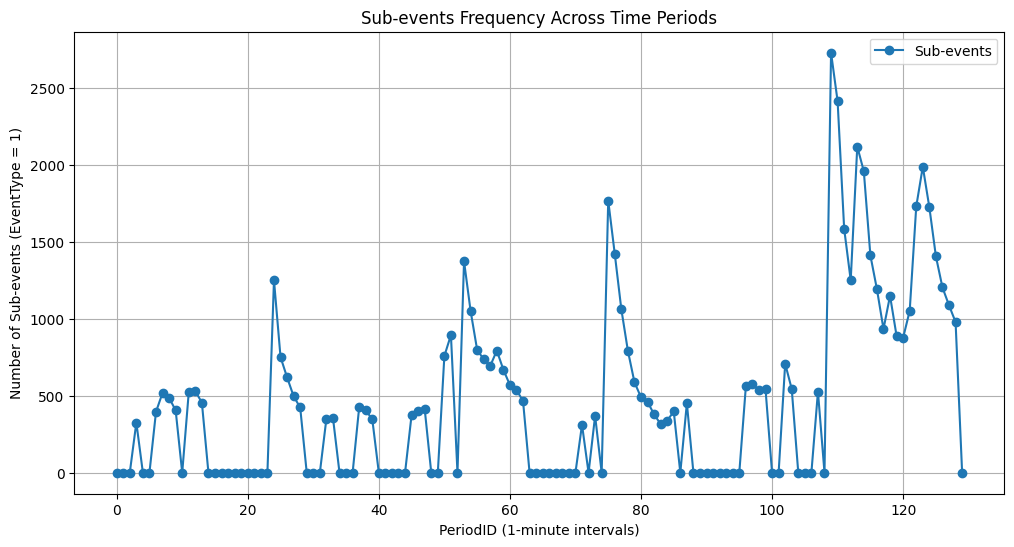

In [3]:
import matplotlib.pyplot as plt

# Aggregate data by PeriodID to count occurrences of EventType = 1 (sub-events)
temporal_data = data.groupby('PeriodID')['EventType'].sum()

# Plot the frequency of EventType = 1 across time periods
plt.figure(figsize=(12, 6))
plt.plot(temporal_data.index, temporal_data.values, marker='o', linestyle='-', label='Sub-events')
plt.title('Sub-events Frequency Across Time Periods')
plt.xlabel('PeriodID (1-minute intervals)')
plt.ylabel('Number of Sub-events (EventType = 1)')
plt.grid()
plt.legend()
plt.show()


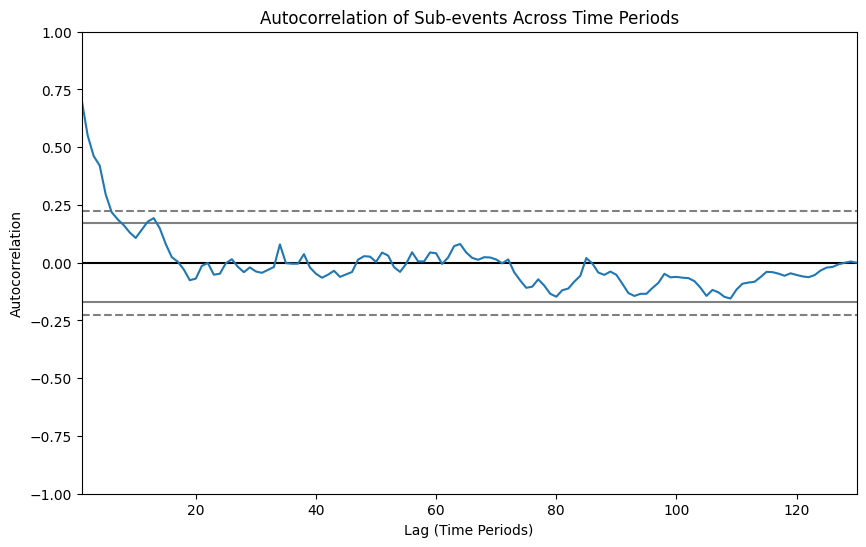

In [4]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation of sub-events (EventType = 1) occurrences over time periods
plt.figure(figsize=(10, 6))
autocorrelation_plot(temporal_data)
plt.title('Autocorrelation of Sub-events Across Time Periods')
plt.xlabel('Lag (Time Periods)')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()


In [9]:
import os
# For all datasets
# Load data
folder_path = "train_tweets"
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")] # Only use first file for testing purposes
df = [pd.read_csv(f) for f in csv_files]
df[0].head()

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,2_0,2,0,0,1403538600000,RT @soccerdotcom: If #ESP beats #AUS we'll giv...
1,2_0,2,0,0,1403538600000,Visit the #SITEP official web site here http:/...
2,2_0,2,0,0,1403538600000,RT @soccerdotcom: If #ESP beats #AUS we'll giv...
3,2_0,2,0,0,1403538600000,RT @worldsoccershop: If there is a winner in t...
4,2_0,2,0,0,1403538600000,RT @soccerdotcom: If #AUS beats #ESP we'll giv...


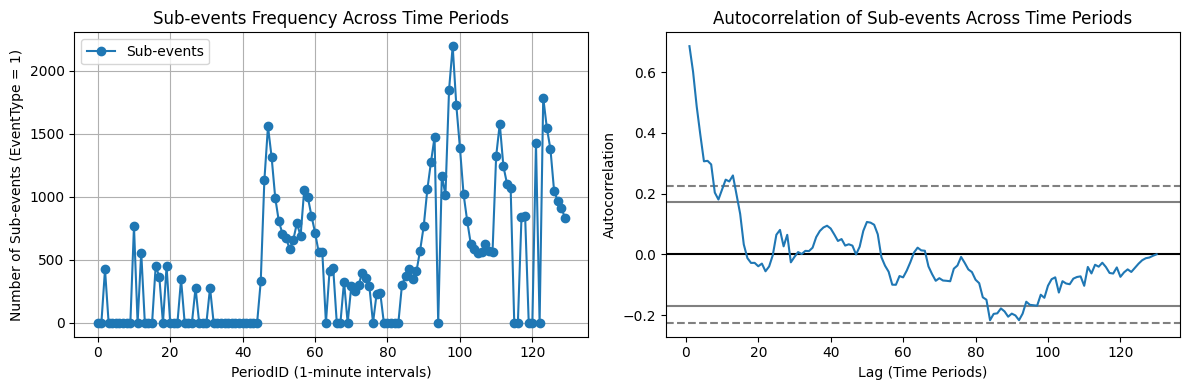

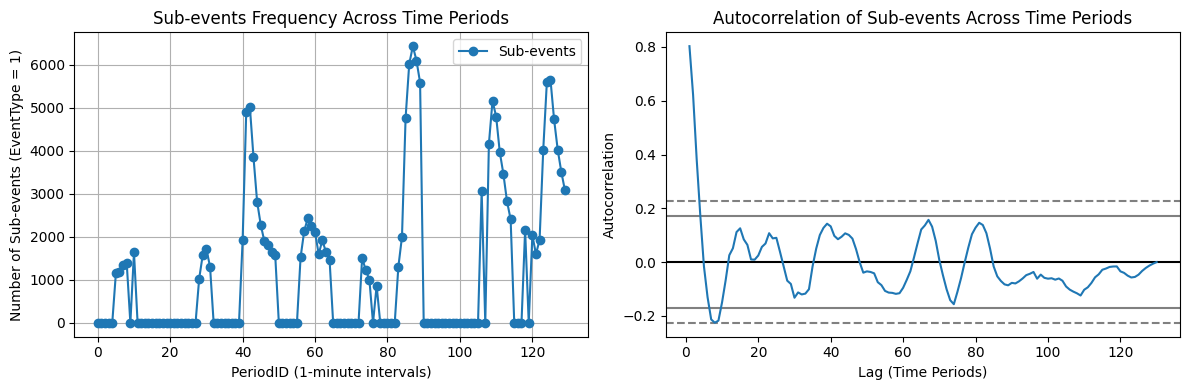

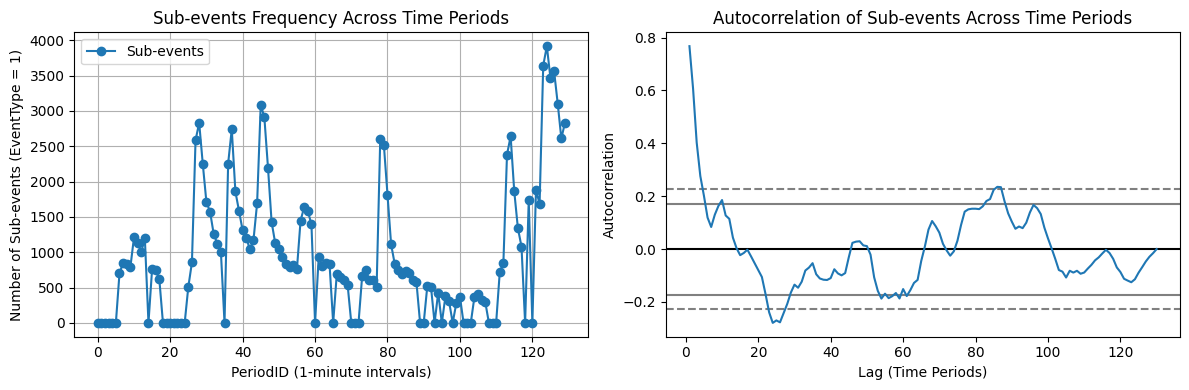

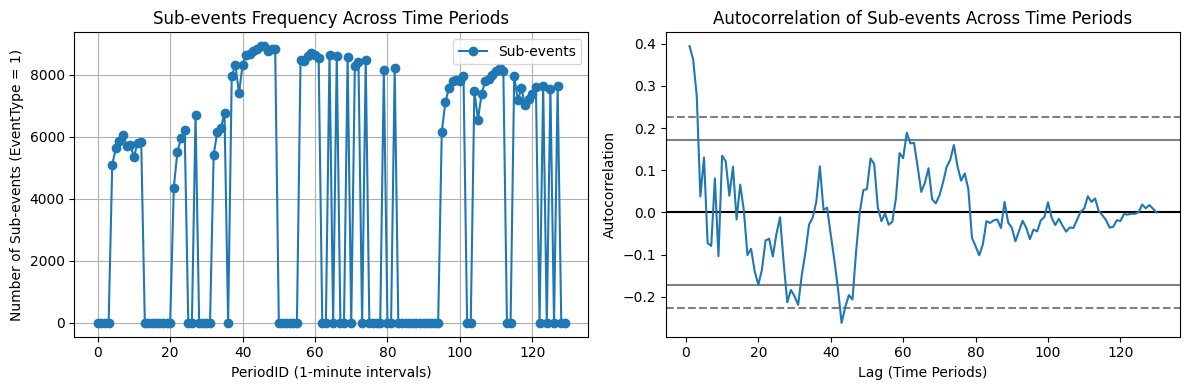

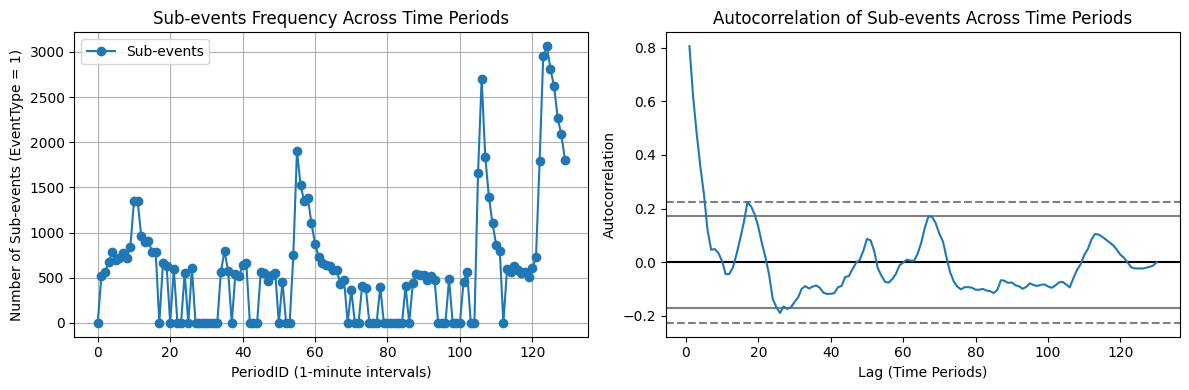

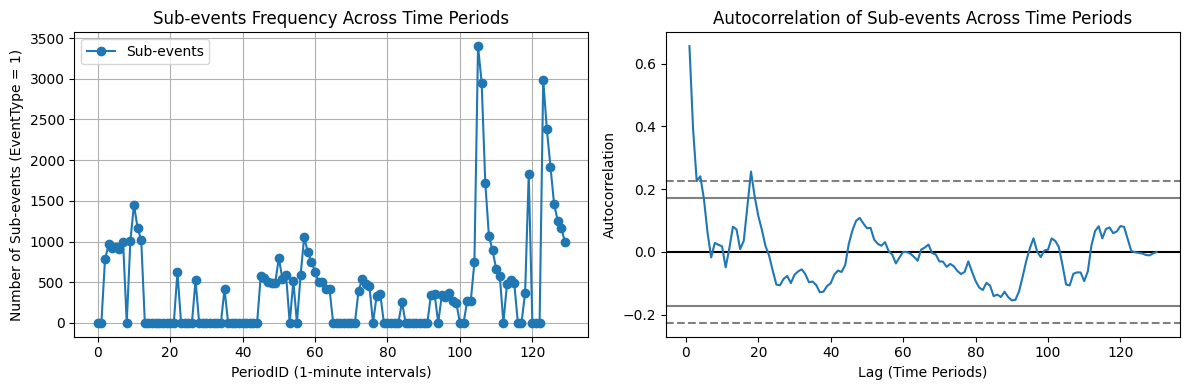

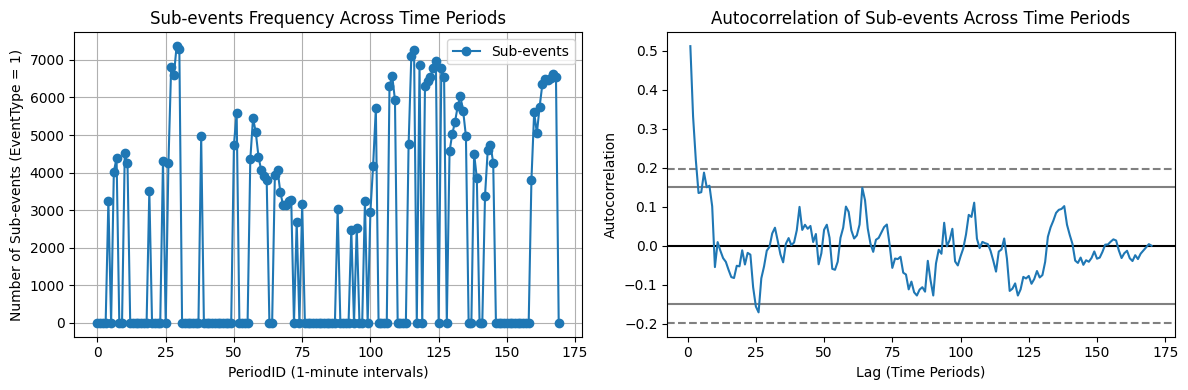

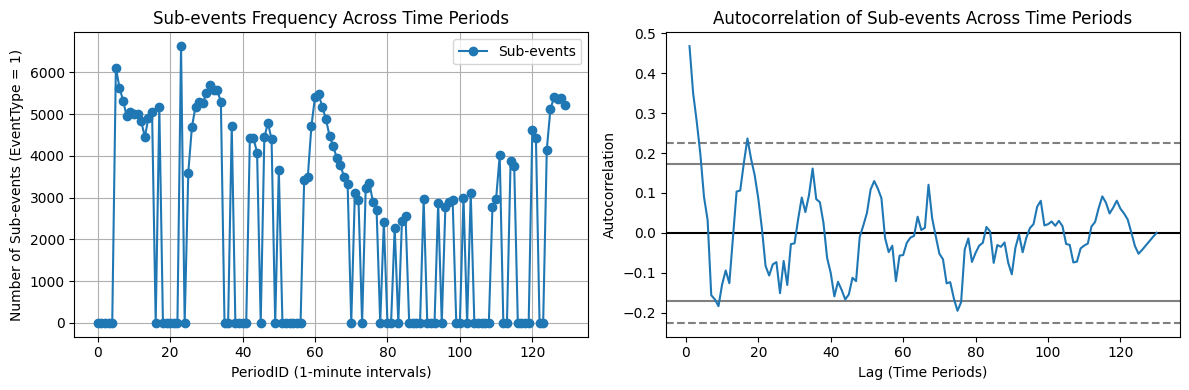

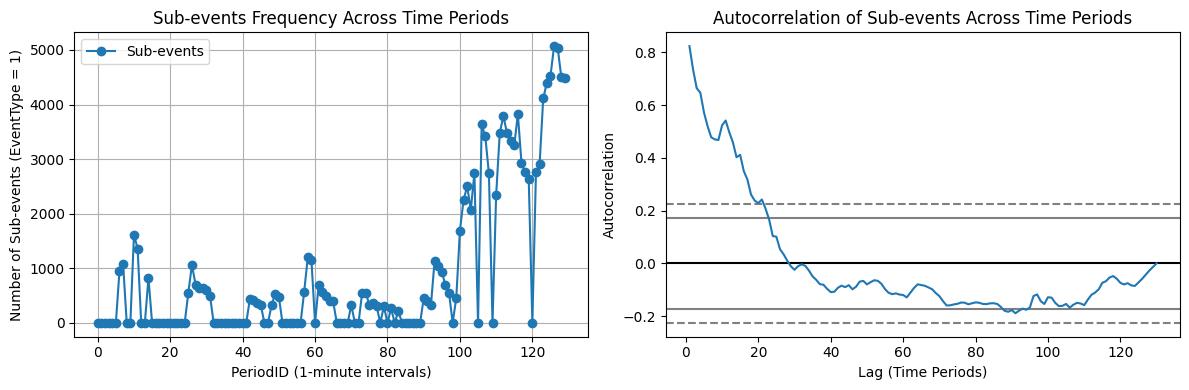

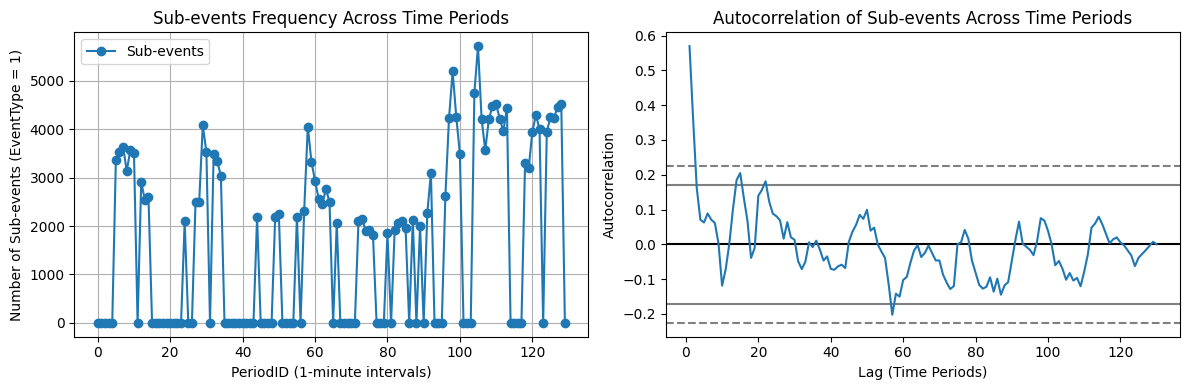

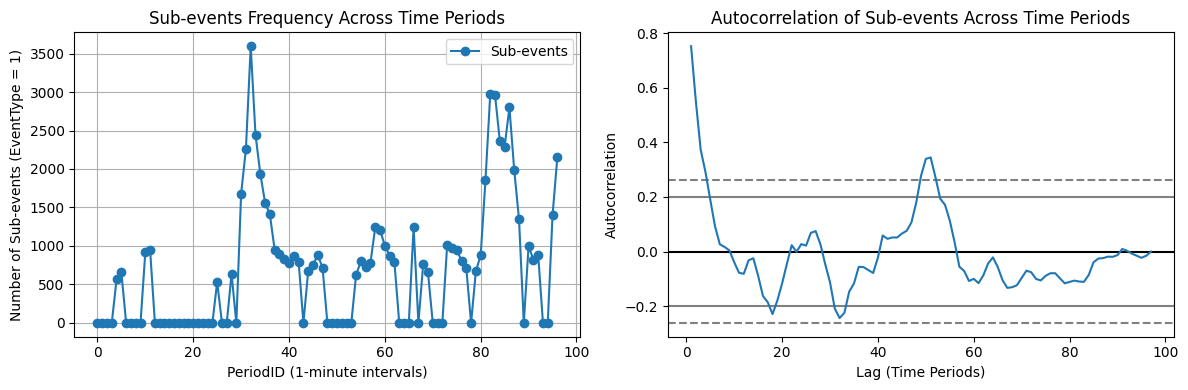

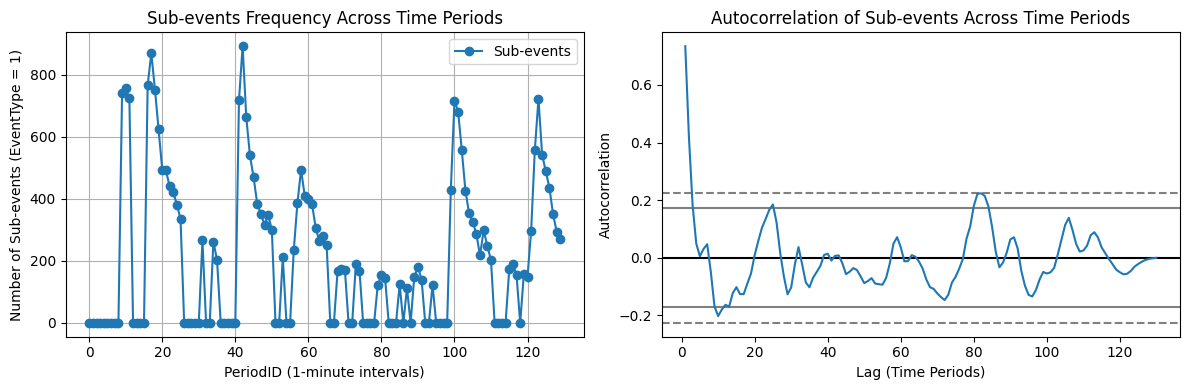

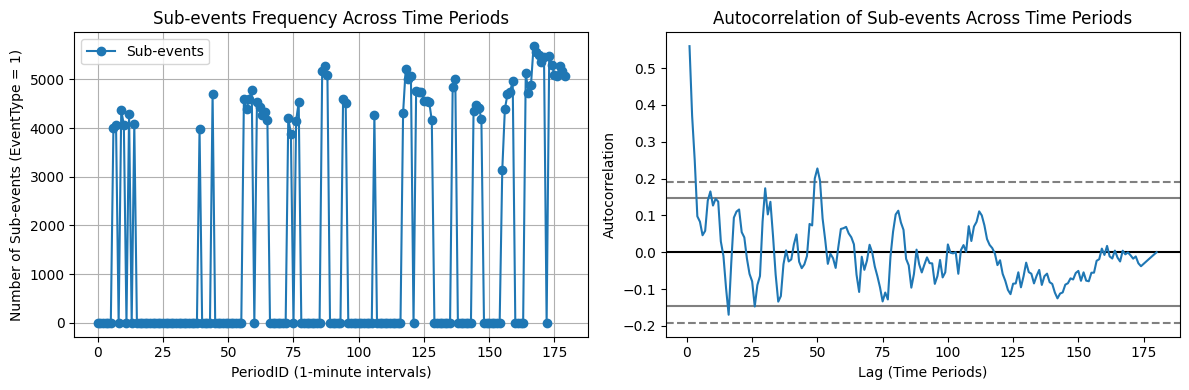

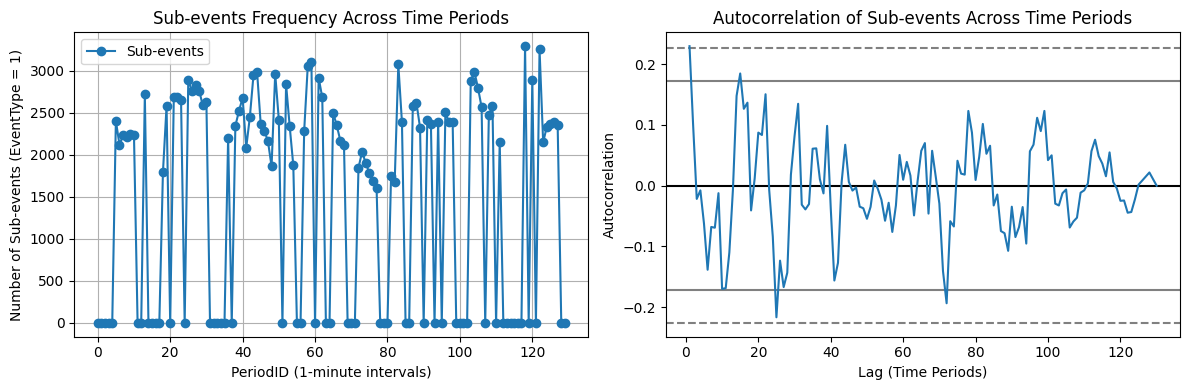

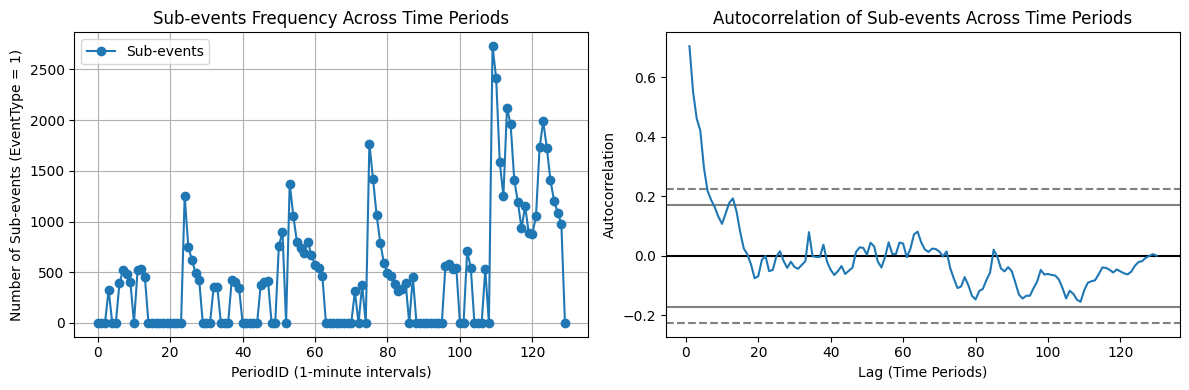

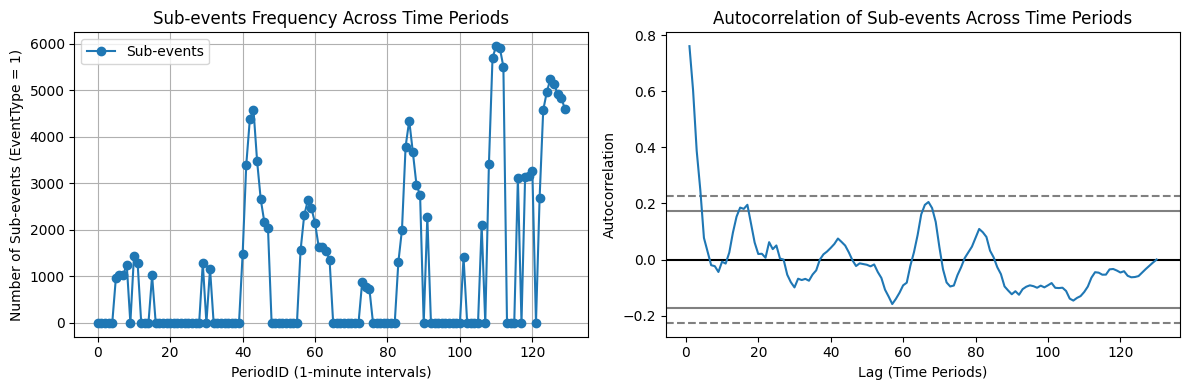

In [22]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

def show_subevent_frequency(df):
    for data in df:
        # Aggregate data by PeriodID to count occurrences of EventType = 1 (sub-events)
        temporal_data = data.groupby('PeriodID')['EventType'].sum()

        # Create a figure with two subplots side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Plot the frequency of EventType = 1 across time periods
        axes[0].plot(temporal_data.index, temporal_data.values, marker='o', linestyle='-', label='Sub-events')
        axes[0].set_title('Sub-events Frequency Across Time Periods')
        axes[0].set_xlabel('PeriodID (1-minute intervals)')
        axes[0].set_ylabel('Number of Sub-events (EventType = 1)')
        axes[0].grid()
        axes[0].legend()

        # Plot autocorrelation of sub-events (EventType = 1) occurrences over time periods
        autocorrelation_plot(temporal_data, ax=axes[1])
        axes[1].set_title('Autocorrelation of Sub-events Across Time Periods')
        axes[1].set_xlabel('Lag (Time Periods)')
        axes[1].set_ylabel('Autocorrelation')
        axes[1].grid()

        # Adjust layout to avoid overlap
        plt.tight_layout()

        # Show the figure
        plt.show()

# Call the function with your dataset
show_subevent_frequency(df)



In [1]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

def show_subevent_frequency_grid(datasets):
    num_datasets = len(datasets)
    grid_size = (num_datasets, 2)  # Rows = num_datasets, Columns = 2 (Frequency and Autocorrelation)

    # Create a grid plot for all datasets
    fig, axes = plt.subplots(num_datasets, 2, figsize=(12, 3 * num_datasets))

    for i, data in enumerate(datasets):
        # Aggregate data by PeriodID to count occurrences of EventType = 1 (sub-events)
        temporal_data = data.groupby('PeriodID')['EventType'].sum()

        # Frequency plot
        ax_freq = axes[i, 0] if num_datasets > 1 else axes[0]
        ax_freq.plot(temporal_data.index, temporal_data.values, marker='o', linestyle='-', label='Sub-events')
        ax_freq.set_title(f'Sub-events Frequency (Dataset {i + 1})')
        ax_freq.set_xlabel('PeriodID (1-minute intervals)')
        ax_freq.set_ylabel('Number of Sub-events')
        ax_freq.grid()
        ax_freq.legend()

        # Autocorrelation plot
        ax_auto = axes[i, 1] if num_datasets > 1 else axes[1]
        autocorrelation_plot(temporal_data, ax=ax_auto)
        ax_auto.set_title(f'Autocorrelation of Sub-events (Dataset {i + 1})')
        ax_auto.set_xlabel('Lag (Time Periods)')
        ax_auto.set_ylabel('Autocorrelation')
        ax_auto.grid()

    # Adjust layout for clarity
    fig.tight_layout()

    # Display the plots
    plt.show()

